$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Nonlinear Regression with Neural Networks

## Linear Models as Neural Networks

Given $X$ and $T$, find $\wv_k$ that minimizes squared error in
the $k^{th}$ output, then use it to make predictions.
Collect all $\wv_k$ as columns in $\Wv$.
$\tilde{\Xv}$ denotes $\Xv$ with  constant 1 column.  The target value
for the $k^{th}$ output for the $n^{th}$ sample is $t_{n,k}$.

$$
\begin{align*}
  E(\Wv) &= \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - \tilde{\xv}_n^T \wv_k)^2\\
   \Wv &= (\tilde{\Xv}^T \tilde{\Xv})^{-1} \tilde{\Xv}^T \Tv\\
 ~\\
  \Wv &= \begin{bmatrix}
    w_{0,1} & w_{0,2} & \cdots & w_{0,K}\\
    w_{1,1} & w_{1,2} & \cdots & w_{1,K}\\
    \vdots\\
    w_{D,1} & w_{D,2} & \cdots & w_{D,K}
  \end{bmatrix}\\
 ~\\
  \Yv &= \tilde{\Xv} \Wv\\
  ~\\
\tilde{\Xv} & \text{ is } N \times (D+1)\\
\Wv & \text{ is } (D+1) \times K\\
\Yv & \text{ is } N \times K
\end{align*}
$$

The calculation of $y_{n,k} = \tilde{\xv_n} \wv_k$ can be drawn as

In [1]:
from IPython.display import Image
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinear.png')

## Adding Nonlinear Combinations of Inputs

Transform $X$ into $\Phiv(X)$.  For example, 

$$
\Phiv(X) = \Phiv\left ( 
\begin{bmatrix}
    x_{0,1} & x_{0,2} & \cdots \\
    x_{1,1} & x_{1,2} & \cdots \\
    \vdots\\
    x_{N-1,1} & x_{N-1,2} & \cdots
  \end{bmatrix}
\right ) = 
\begin{bmatrix}
    x_{0,1} & x_{0,2}^5  & x_{0,2}^3 x_{0,4}^2 & \cdots \\
    x_{1,1} & x_{1,2}^5  & x_{1,2}^3 x_{1,4}^2 & \cdots\\
    \vdots\\
    x_{N-1,1} & x_{N-1,2}^5 & x_{N-1,2}^3 x_{N-1,4}^2 & \cdots
  \end{bmatrix}
$$

Now we just replace $\Xv$ by $\Phiv$ (which we use to represent
$\Phiv(X)$, and $\Phiv_n = \Phiv(\xv_n)$) and proceed. 
We do our derivation to minimize

$$
  E_k = \sum_{n=1}^N (t_{n,k} - \tilde\Phiv_n^T \wv_k))^2
$$

from which we find that 

$$
  \Wv = (\tilde{\Phiv}^T \tilde{\Phiv})^{-1} \tilde{\Phiv}^T T
$$

and use it like

$$
\begin{align*}
  \Yv = \tilde{\Phiv} \Wv
\end{align*}
$$

In [2]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinearphi.png')

Now, what should we put in the yellow box?  

Can we use the training data to figure this out?

## Structure of a Two Layer Neural Network

We have just entered the world of neural networks, with $\phi(\xv) = h(\xv)$. 

In [3]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayer.png')

$\;\;\;\; \tilde{\Xv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Vv \;\;\;\;\;\;\;\;\;\;\;\;$
$ \tilde{\Zv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Wv \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\; \Yv \;\;\;\;\;\;\;\;\;\;\;\;$

$ N \times (D+1) \;$
$(D+1) \times M \;$
$ N \times (M+1) \;$
$(M+1)\times K \;$
$ N \times K$

$$
\begin{align*}
\tilde{\Zv} & = h(\tilde{\Xv} \Vv),\\
\Yv & = \tilde{\Zv} \Wv, \text{ or }\\
\Yv & = \tilde{h}(\tilde{\Xv} \Vv) \Wv 
\end{align*}
$$

The two layers are called the **hidden** and **output** layer.

$h$ is the **activation function** for the units in the hidden layer.

We will be doing gradient descent in the squared error, so want
an $h$ whose derivative doesn't grow out of control as $\vv$ grows, and whose
derivative is easy to calculate.

What about polynomials?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

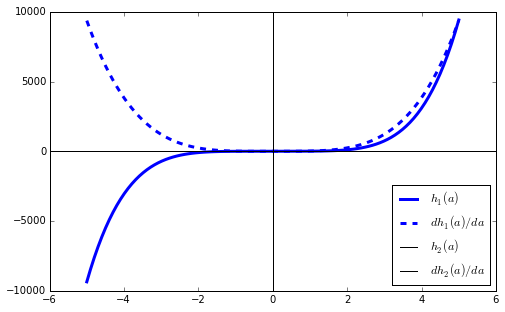

In [2]:
def h(x):
    return 3 + 2 * x + 1 * x**2 + 3 * x**5

def dh(x):
    return 2 + 2 * x + 15 * x**4

plt.figure(figsize=(8,5))
xs = np.linspace(-5,5,100)
plt.plot(xs,h(xs),'b-',linewidth=3)
plt.plot(xs,dh(xs),'b--',linewidth=3)

plt.plot((-6,6),(0,0),'k')
plt.plot((0,0),(-10000,10000),'k')
plt.plot([0,0],[-1,1],'r--',linewidth=3,alpha=0.5,)
plt.legend(('$h_1(a)$','$d h_1(a)/da$','$h_2(a)$','$d h_2(a)/da$'),loc='best');

A gradient descent procedure takes steps of size proportional to the derivative.  This derivative get huge, so gradient descent if very unstable.  Such huge steps will shoot the gradient descent far away from a close local minimum.

Two common choices for functions with well-behaved derivatives are, where $a = \tilde{\xv}^T \vv$:
  * sigmoid (asymmetric)
$$
        \begin{align*}
          h_1(a) & = \frac{1}{1+e^{-a}}
        \end{align*}
$$
  * tanh (symmetric)
$$
        \begin{align*}
          h_2(a) & = \tanh(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}
        \end{align*}
$$

Work out their derivatives in class.

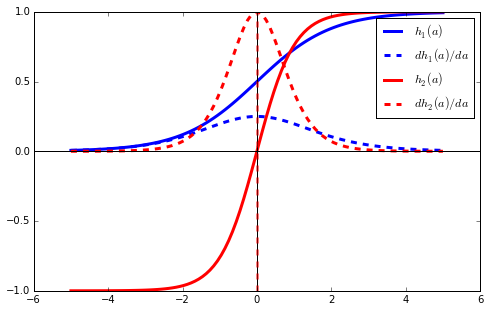

In [3]:
def h1(a):
    return 1 / (1 + np.exp(-a))

def h2(a):
    return np.tanh(a)

def dh1(a):
    y = h1(a)
    return y * (1 - y)

def dh2(a):
    y = h2(a)
    return 1 - y*y

plt.figure(figsize=(8,5))
xs = np.linspace(-5,5,100)
plt.plot(xs,h1(xs),'b-',linewidth=3)
plt.plot(xs,dh1(xs),'b--',linewidth=3)

plt.plot(xs,h2(xs),'r-',linewidth=3)
plt.plot(xs,dh2(xs),'r--',linewidth=3)

plt.plot((-6,6),(0,0),'k')
plt.plot((0,0),(-1,1),'k')
plt.plot([0,0],[-1,1],'r--',linewidth=3,alpha=0.5,)
plt.legend(('$h_1(a)$','$d h_1(a)/da$','$h_2(a)$','$d h_2(a)/da$'),loc='best');

## Training by Gradient Descent

The mean squared error between each target value $t_{n,k}$ and
output (predicted) value $y_{n,k}$ is

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K ( t_{n,k} - y_{n,k})^2
\end{align*}
$$

Since $E$ is no longer a linear function of the parameters (weights), we cannot set the derivative equal to zero and solve for the parameters.  Instead, we can do 
gradient descent in $E$ by making small changes to weights $v_{j,m}$ and $w_{m,k}$ in the negative gradient direction. 

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial v_{j,m}}\\
  w_{m,k} &\leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

This is often presented as $\rho_h = \rho_o$, but having different
rates in the two layers often helps convergence rate.

Will this find the global optimum (the values of $v$ and $w$
that minimize the mean squared error)?

### First a Simplified View

Remember our picture of a full two-layer network?  Let's focus
on how to modify a single weight, $v_{1,1}$:

In [7]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayerTargetsOnePath.png')

Let's drop the subscripts for now.

In [8]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnOnePath.png')

Forward calculation (ignoring constant 1 input and all other terms)

$$
\begin{align*}
  y &= w\; h(v\;x) \text{ or }\\
  y &= w\; z\\
  z &= h(a)\\
  a &= v\; x
\end{align*}
$$

In [9]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnOnePath2.png')

Since $E = (t - y)^2$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t - y)^2}{\partial v}
\end{align*}
$$

The Chain Rule to the rescue.

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t-y)^2}{\partial v}\\
  & = \frac{\partial (t-y)^2}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
  & = 2(t-y) \;\;(-1)\;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
\end{align*}
$$

If $h(a) = \tanh(a)$, then $\frac{\partial h(a)}{\partial a} = (1-h(a)^2) = (1-z^2)$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = -2(t-y) \;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
  & = -2(t-y) \;\; w \;\;  (1-z^2) \;\; x
\end{align*}
$$

Let's add another output.

In [10]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoPath.png')

The Chain Rule again.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial v}\\
       & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial y_1}\frac{\partial y_1}{\partial z} + \frac{\partial (y_1-t_1)^2 + (y_2-t_2)^2}{\partial y_2}\frac{\partial
           y_2}{\partial z} \right )  \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( -2(t_1-y_1) w_1 - 2(t_2 -y_2) w_2 \right ) \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) \frac{\partial h(a)}{\partial a} x \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x 
       \end{align*}
$$

Now for the delta rules, where "deltas" are backpropagated errors.

First, remember these derivatives.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = -2 ( (t_1-y_1) w_1 + (t_2-y_2) w_2  ) (1-z^2) x \\
       \frac{\partial E}{\partial w_1} & = -2 (t_1-y_1) z
       \end{align*}
$$

Now the update rules involving the deltas ($\delta$) are 

$$
       \begin{align*}
       w &\leftarrow w - \frac{\partial E}{\partial w_1}\\
       &\leftarrow w + \rho_o  (t_1-y_1) z\\
       &\leftarrow w + \rho_o  \delta_1^{(o)}  z\\
       v & \leftarrow v - \frac{\partial E}{\partial v}\\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \delta^{(h)} x\\
&\;\;\; \text{ where } \delta^{(h)} =  ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2  ) (1-z^2)
       \end{align*}
$$

### Now for the Full Version of Back-Propagation

In [11]:
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayerBackProp.png')

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial
    v_{j,m}}\\
 w_{m,k} & \leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

The following derivation with a bit of calculus and algebra will
result in

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) w_{m,k} (1-\tilde{z}_m^2) \tilde{x}_{n,j}\\
  w_{m,k} &\leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N
  (t_{n,k} - y_{n,k}) \tilde{z}_m
\end{align*}
$$

Now we will derive this result.
First work on $\frac{\partial E}{\partial w_{m,k}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial w_{m,k}}\\
  \text{Since } & y_{n,k'} = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M w_{m',k'} \tilde{z}_{n,m'}  \right )}{\partial w_{m,k}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
\end{align*}
$$

Now the hard one,  $\frac{\partial E}{\partial v_{j,m}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial  v_{j,m}}
\end{align*}
$$

Knowing that 

$$
\begin{align*}
  y_{n,k'} & = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  &  = \sum_{m'=0}^M  w_{m',k'} \tilde{h}\left ( \sum_{j'=0}^D
    v_{j,m'} \tilde{x}_{n,j'} \right )
\end{align*}
$$

we can continue.

$$
\begin{align*}
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M  w_{m',k'} \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'} \right ) \right )}{\partial v_{j,m}}\\ 
  \text{Let } a_{n,m'} & = \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'}  \right )\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} 
  \frac{\partial \tilde{h}(a_{n,m'})}{\partial  a_{n,m'}} \frac{\partial a_{n,m'}}{\partial v_{j,m}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} \frac{\partial \tilde{h}(a_{n,m'})}{\partial a_{n,m'}} \tilde{x}_{n,j}
\end{align*}
$$

To summarize:

$$
    \begin{align*}
      E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N}  \frac{1}{K}
       \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}
    \end{align*}
$$

Forward pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass

$$
\begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
    \end{align*}
$$

## Preparing for Python

Convert these scalar expressions to matrix expressions.

Forward Pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      z_{n,m} &= h( v_{*,m} \tilde{x}_{n,*})\\
      z_{n,m} &= h(  \tilde{x}_{n,*} v_{*,m})\\
      z_{*_n,m} &= h(  \tilde{x}_{*_n,*} v_{*,m})\\
      z_{*_n,*_m} &= h(  \tilde{x}_{*_n,*} v_{*,*_m})\\
      \Zv &= h(\tilde{\Xv} \Vv)\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}\\
      y_{n,k} &=  \tilde{z}_{n,*} w_{*,k}\\
      y_{*_n,*_k} &=  \tilde{z}_{*_n,*} w_{*,*_k}\\
      \Yv &= \tilde{\Zv} \Wv
    \end{align*}
$$

Backward Pass for $\Vv$

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N  (t_{n,*_k} - y_{n,*_k}) w_{m,*_k}^T   (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \dimensionbar{N\times m} \right )^T
      \tilde{x}_{*_n,j} 
\end{align*}
$$

Almost.  Result on right hand side has subscripts $m,j$, but left side is $j,m$. So

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \dimensionbar{D\times N} \left ( (\Tv - \Yv) \dimensionbar{N\times K} \hat{\Wv}^T \dimensionbar{N\times M} \cdot  (1-\Zv^2)
         \dimensionbar{N\times M}\right ) \dimensionbar{D\times M}\\
       \text{where } & \hat{\Wv} \text{ is } \Wv \text{ without constant input row}
\end{align*}
$$


Backward Pass for $\Wv$

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m}
    \end{align*}
$$

Again, almost.  Result on right hand side has subscripts $k,m$ but need $m,k$. So

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K}   \left ( (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m} \right )^T\\
       & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K} \tilde{z}_{*_n,m}^T (t_{*_n,k} - y_{*_n,k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T (\Tv - \Yv)\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T \dimensionbar{M\times N} (\Tv - \Yv \dimensionbar{N\times K}) \dimensionbar{M\times K}
    \end{align*}
$$

All together now, first in math.

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$

Now in python.

    X1 = addOnes(X)
    Z = tanh(np.dot( X1, V ))
    Z1 = addOnes(Z)
    Y = np.dot( Z1, W )
    error = T - Y
    V = V + rh * np.dot( X1.T, np.dot( error, W[1:,:].T) * (1-Z**2))
    W = W + ro * np.dot( Z1.T, error)

## Finally, the Code

The above equations show a single step down the gradient of our mean square error, $E$.  This is called [steepest descent](http://en.wikipedia.org/wiki/Gradient_descent).

Here is an example. Let's fit a neural network to the function

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

where $\epsilon$ is a random variable drawn from the standard normal
distribution, or $\epsilon \sim \mathcal{N}(0,1)$, and $x \in [-10,10]$.

In [4]:
import math as ma
%timeit ma.sqrt(5.43)
%timeit np.sqrt(5.43)

The slowest run took 39.94 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 105 ns per loop
The slowest run took 90.62 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 980 ns per loop


In [5]:
1.79/0.182

9.835164835164836

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [7]:
# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

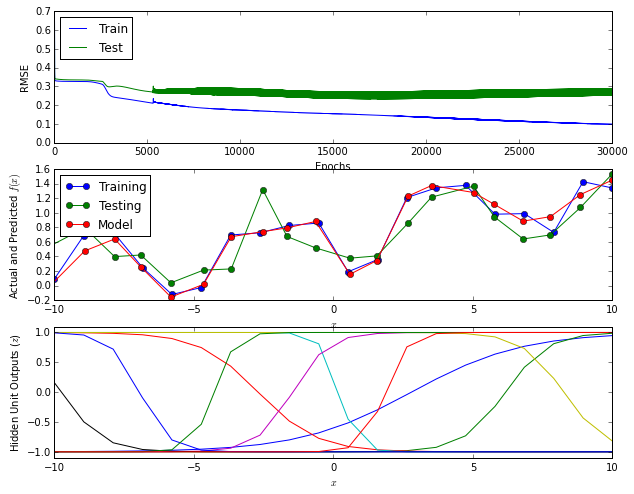

In [9]:
# Set parameters of neural network
nHiddens = 10

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.hstack((np.ones((A.shape[0],1)),A))
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 30000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(np.dot( X1, V ))
    Z1 = addOnes(Z)
    Y = np.dot( Z1, W )

    # Error in output
    error = T - Y

    # Backward pass - the backpropagation and weight update steps
    V = V + rh * np.dot( X1.T, np.dot( error, W[1:,:].T) * (1-Z**2))
    W = W + ro * np.dot( Z1.T, error)

    # error traces for plotting
    errorTrace[reps,0] = ma.sqrt(np.mean((error**2)))
    Ytest = np.dot(addOnes(np.tanh(np.dot(Xtest1,V))), W)  #!! Forward pass in one line
    errorTrace[reps,1] = ma.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## Scaled Conjugate Gradient Algorithm

### The Scaled Part

The first derivative of an error function with respect to the
parameters of your model tells you which direction in the parameter
space to proceed to reduce the error function.  But how far do you go?
So far we have just taken a small step by subtracting a small constant
times the derivative from our current parameter values.

If we are in the vicinity of a minimum of the error function, we could
do what Newton did...approximate the function at the current parameter
value with a parabola and solve for the minimum of the parabola.  Use
this as the next guess at a good parameter value.  If the error
function is quadratic in the parameter, then we jump to the true
minimum immediately.

How would you fit a parabola to a function at a particular value of
$x$?  We can derive a way to do this using a truncated Taylor series
(google that) to approximate the function about a value of $x$:

$$
f(x+\Delta x) \approx \hat{f}(x+\Delta x) = f(x) + f'(x) \Delta x + \frac{1}{2} f''(x) \Delta x^2
+ \cdots
$$

Now we want to know what value of $\Delta x$ minimizes
$\hat{f}(x+\Delta x)$.  So take its derivative and set equal to zero.

$$
\begin{align*}
\frac{d \hat{f}(x+\Delta x)}{d\Delta x} &= f'(x) + \frac{1}{2} 2 f''(x)
\Delta x\\
& = f'(x) + f''(x) \Delta x
\end{align*}
$$

Setting equal to zero we get

$$
\begin{align*}
0 &= f'(x) + f''(x) \Delta x\\
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

Now we can update our guess for $x$ by adding $\Delta x$ to it.  Then,
fit a new parabola at the new value of $x$, calculate $\Delta x$, and
update $x$ again.  Actually, the last equation above does the parabola
approximation and calculation of $\Delta x$.

Here is a simple example.  Say we want to find the minimum of

$$
f(x) = 2 x^4 + 3 x^3 + 3
$$
To calculate

$$
\begin{align*}
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

we need the function's first and second derivatives.  The are

$$
\begin{align*}
f'(x) &= 8 x^3 + 9 x^2\\
f''(x) &= 24 x^2 + 18 x
\end{align*}
$$

All together now, in python!

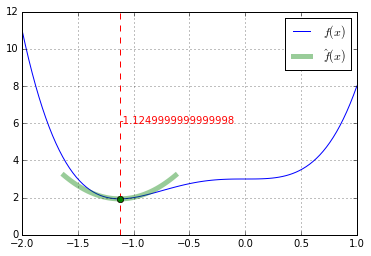

In [10]:
def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

x = -2  # our initial guess
def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

x = -2  # first guess at minimum

xs = np.linspace(-2,1,num=100)

fig = plt.figure()

dxs = np.linspace(-0.5,0.5,num=100)

for rep in range(10):
    time.sleep(2) # sleep 3 seconds
    plt.clf()
    plt.plot(xs,f(xs))
    plt.grid('on')
    plt.plot(x+dxs, taylorf(x,dxs),'g-',linewidth=5,alpha=0.4)
    plt.plot(x,f(x),'ro')         
    y0,y1 = plt.ylim()
    plt.plot([x,x],[y0,y1],'r--')
    
    x = x - df(x) / float(ddf(x))
    plt.plot(x,f(x),'go')
    plt.text(x,(y0+y1)*0.5,str(x),color='r')
    plt.legend(('$f(x)$','$\hat{f}(x)$'))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

This has all been for a function $f(x)$ of a single, scalar variable
$x$.  To minimize a squared error function for a neural network, $x$
will consist of all the weights of the neural network.  If all of the
weights are collected into the vector $\wv$, then the first derivative
of the squared error function, $f$, with respect to the weight vector,
$\wv$, is a vector of derivatives like $\frac{\partial f}{\partial
w_{i}}$.  This is usually written as the gradient

$$
\nabla_{\wv} f =
(\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},
\ldots, \frac{\partial f}{\partial w_{n}}).
$$

The second derivative will be $n\times n$ matrix of values like
$\frac{\partial^2 f}{\partial w_i \partial w_j}$, usually
written as the Hessian

$$
\nabla^2_{\wv} f =
\begin{pmatrix}
\frac{\partial^2 f}{\partial w_1 \partial w_1} & 
\frac{\partial^2 f}{\partial w_1 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_1 \partial w_n}\\
\frac{\partial^2 f}{\partial w_2 \partial w_1} & 
\frac{\partial^2 f}{\partial w_2 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_2 \partial w_n}\\
\vdots \\
\frac{\partial^2 f}{\partial w_n \partial w_1} & 
\frac{\partial^2 f}{\partial w_n \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_n \partial w_n}
\end{pmatrix}
$$

It is often impractical to
construct and use the Hessian.  We
will consider ways to approximate the product of the Hessian and a
matrix as part of the Scaled Conjugate Gradient algorithm.

### The Conjugate Part

Let $E(\wv)$ be the error function (mean square error over training samples) we wish to minimize by
findig the best $\wv$. Steepest descent will find new $\wv$ by
minimizing $E(\wv)$ in successive directions $\dv_0, \dv_1, \ldots$
for which $\dv_i^T \dv_j = 0$ for $i \neq j$.  In other words, the
search directions are orthogonal to each other, resulting in a zig-zag
pattern of steps, some of which are in the same directions.  

Another problem with orthogonal directions is that forcing the second
direction, for example, to be orthogonal to the first will not be in
the direction of the minimum unless the error function is quadratic
and its contours are circles.

We would rather choose a new direction based on the previous ones and
on the curvature, or second derivative, of the error function at the
current $\wv$.

Say we have picked a direction, $\dv_i$, at Step $i$  and we have
picked a scalar $\alpha$ that minimizes the error in that direction,
so the new value of $\wv$ is $\wv_{i+1} = \wv_i + \alpha \dv_i$.
Since $E(\wv_{i+1})$ is minimized, we know

$$
\begin{align*}
\frac{d}{d\alpha} E(\wv_{i+1}) &= 0\\
\end{align*}
$$

and

$$
\begin{align*}
\frac{d}{d\alpha} E(\wv_{i+1}) &= \frac{d}{d\wv_{i+1}} E(\wv_{i+1}) \frac{d}{d\alpha} \wv_{i+1}\\
& = E'(\wv_{i+1})^T \dv_i\\
& = 0
\end{align*}
$$

Now, after minimizing along any new direction $\dv_j$ to get
$\wv_{j+1}$ we want

$$
E'(\wv_{j+1})^T \dv_i = 0
$$

We can derive what the new directions should be by the following
steps.  First, let's approximate $E(\wv_{j+1})$ with a second-order
Taylor series expansion.

$$
\begin{align*}
E(\wv_{j+1}) & = E(\wv_j + \alpha_j \dv_j)\\
& \approx E(\wv_j) + \alpha_j \dv_j^T E'(\wv_j) + \frac{1}{2}
\alpha_j^2 \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

We can differentiate this to get

$$
\begin{align*}
E'(\wv_{j+1})  \approx E'(\wv_j) + \alpha_j  E''(\wv_j) \dv_j
\end{align*}
$$

We want

$$
\begin{align*}
E'(\wv_{j+1})^T \dv_i = 0
\end{align*}
$$

which can now be rewritten as

$$
\begin{align*}
\left (E'(\wv_j) + \alpha_j E''(\wv_j) \dv_j \right )^T \dv_i &= 0\\
E'(\wv_j)^T \dv_i + \dv_j^T \alpha_j E''(\wv_j) \dv_i &= 0\\
\end{align*}
$$

Since we want the first term to be 0,

$$
\begin{align*}
\dv_j^T E''(\wv_j) \dv_i &= 0
\end{align*}
$$

Directions $\dv_j$ and $\dv_i$ for which this condition holds are said
to be mutually conjugate with respect to the second derivative of the
error function.

Now we need a procedure for picking successive directions that meet
this condition.

   1. Use the initial weight vector $\wv_0$ and derivative (gradient) of the error function to select the first direction.
$$
\begin{align}
\gv_0 & = -E'(\wv_0)\\
\dv_0 & = \gv_0\\
k &= 0
\end{align}
$$
   2. Do line search to find best $\alpha_k$ and new $\wv_{k+1}$.
$$\begin{align}
\alpha_k &= \argmin{\alpha} E(\wv_k + \alpha \dv_k)\\
\wv_{k+1} &= \wv_k + \alpha_k \dv_k\\
\end{align}
$$
   3. Calculate new gradient of error function.
$$
\begin{align}
\gv_{k+1} &= -E'(\wv_{k+1})
\end{align}
$$
   4. Form new direction from combination of previous direction and new gradient, or reset.
$$
\begin{align}
\text{if } k \text{ mod } D = 0, & \text{then}\\
&\dv_{k+1} = \gv_{k+1}\\
\text{else} &\\
&\beta_k = \frac{|\gv_{k+1}|^2 - \gv_{k+1}^T \gv_k}{|\gv_k|^2}\\
&\dv_{k+1} = \gv_{k+1} + \beta_k \dv_k\\
\end{align}
$$
   5. Update $k = k + 1$ and repeat at Step 2 or terminate.

Notice that $E''(\wv)$ does not have to be calculated.

Step 2 involves a minimization search along the line $\wv_k + \alpha
\dv_k$.  The Scaled Conjugate Gradient (SCG) algorithm,
[Efficient
Training of Feed-Forward Neural Networks, by Moller](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.50.8063&rep=rep1&type=pdf), replaces this
line search by assuming the error function is locally quadratic,
approximating the second derivative of the error function, and solving
for the new value of $\wv$ that would minimize the quadratic function.
A number of additional steps are taken to improve the quadratic
approximation.

The new value of $\wv$ is found by the following procedure.  Again,
we use the Taylor series expansion of the error function

$$
\begin{align*}
E(\wv_{j+1}) & = E(\wv_j + \alpha_j \dv_j)\\
& \approx E(\wv_j) + \alpha_j \dv_j^T E'(\wv_j) + \frac{1}{2}
\alpha_j^2 \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

but this time we take the derivative with respect to $\alpha$.

$$
\begin{align*}
\frac{d}{d\alpha_j} E(\wv_{j+1}) & \approx  \dv_j^T E'(\wv_j) + 
\alpha_j \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

We set this equal to zero and solve for $\alpha_j$.

$$
\alpha_j = \frac{- \dv_j^T E'(\wv_j)}{\dv_j^T E''(\wv_j)\dv_j}
$$

$E''(\wv)$ must be positive definite for the second-order approximation
to be a bowl with a valid minimum.  SCG follows the same approach as
the Levenberg-Marquardt method for forcing this by adding $\lambda_k
I$ to $E''(\wv)$ and adjusting $\lambda_k$ according to good the
second-order approximation is of the error function.

Rather than calculating $E''(\wv_k)$, SCG approximates $E''(\wv_k)
\dv_k$ by

$$
\begin{align*}
E''(\wv_k) \dv_k &\approx \frac{E'(\wv_k + \sigma_k \dv_k) -
E'(\wv_k)}{\sigma_k}\\
\sigma_k &= \frac{\epsilon}{|\dv_k|^2}
\end{align*}
$$
for $\epsilon$ a small positive constant.

In [18]:
!wget http://www.cs.colostate.edu/~anderson/cs545/notebooks/scg.tar

--2015-01-15 11:08:05--  http://www.cs.colostate.edu/~anderson/cs545/notebooks/scg.tar
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30720 (30K) [application/x-tar]
Saving to: ‘scg.tar.1’

scg.tar.1           100%[=====================>]  30.00K  --.-KB/s   in 0s     

2015-01-15 11:08:05 (428 MB/s) - ‘scg.tar.1’ saved [30720/30720]



In [19]:
!tar xvf scg.tar

scaledconjugategradient.py
mlutils.py


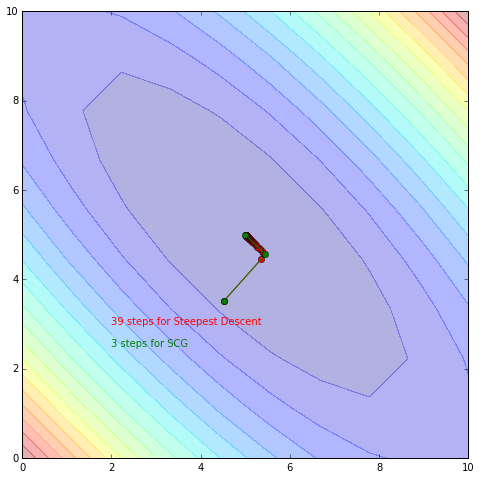

In [11]:
import scaledconjugategradient as scg

def parabola(x,xmin,s):
    d = x - xmin
    return np.dot(np.dot(d,S),d.T)

def parabolaGrad(x,xmin,s):
    d = x - xmin
    return 2 * np.dot(s,d)

f = parabola
df = parabolaGrad
center = np.array([5,5])
S = np.array([[5,4],[4,5]])

n = 10
xs = np.linspace(0,10,n)
ys = np.linspace(0,10,n)
X,Y = np.meshgrid(xs,ys)
both = np.vstack((X.flat,Y.flat)).T
nall = n*n
Z = np.zeros(nall)
for i in range(n*n):
    Z[i] = parabola(both[i,:],center,S)
Z.resize((n,n))

fig = plt.figure(figsize=(8,8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(0,10,2)

    resultSCG = scg.scg(firstx, f, df, center, S, xPrecision=0.001, xtracep=True)
    resultSteepest =  scg.steepest(firstx,f,df,center,S,stepsize=0.05,xPrecision=0.001,xtracep=True)

    plt.clf()
    plt.contourf(X,Y,Z,20,alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[:,0],xt[:,1],'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:,0],xt[:,1],'go-')

    plt.text(2,3,"%s steps for Steepest Descent" % resultSteepest['xtrace'].shape[0],color='red')
    plt.text(2,2.5,"%s steps for SCG" % resultSCG['xtrace'].shape[0],color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

Rosenbrock's function is often used to test optimization algorithms.
It is

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

In [12]:
def rosen(x):
    v = 100 * ((x[1] - x[0]**2)**2) + (1.0 - x[0])**2
    return v

def rosenGrad(x):
    g1 = -400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0])
    g2 =  200 * (x[1] - x[0]**2)
    return np.array([g1,g2])

f = rosen
df = rosenGrad

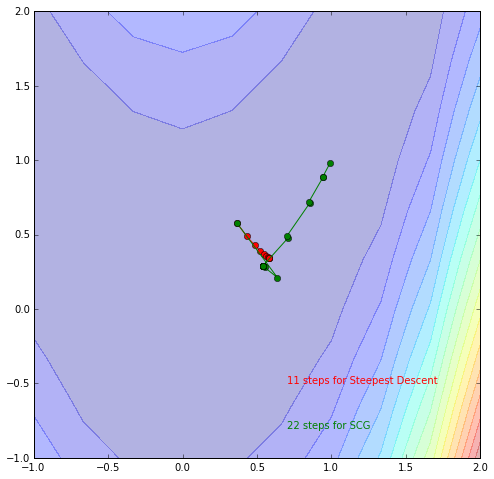

In [13]:
n = 10
xmin,xmax = -1,2
xs = np.linspace(xmin,xmax,n)
ys = np.linspace(xmin,xmax,n)
X,Y = np.meshgrid(xs,ys)
both = np.vstack((X.flat,Y.flat)).T
nall = n*n
Z = np.zeros(nall)
for i in range(n*n):
    Z[i] = f(both[i,:])
Z.resize((n,n))

fig = plt.figure(figsize=(8,8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(xmin,xmax,2)

    resultSCG = scg.scg(firstx, f, df, xPrecision=0.001, xtracep=True)
    resultSteepest =  scg.steepest(firstx,f,df,stepsize=0.001,xPrecision=0.001,xtracep=True)

    plt.clf()
    plt.contourf(X,Y,Z,20,alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[:,0],xt[:,1],'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:,0],xt[:,1],'go-')

    plt.text(0.7,-0.5,"%s steps for Steepest Descent" % resultSteepest['nIterations'],color='red')
    plt.text(0.7,-0.8,"%s steps for SCG" % resultSCG['nIterations'],color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

Only difficulty is that our *scg* (and *steepest*) implementation
requires all parameters to be concatenated in a single vector.  We
will use *pack* and *unpack* functions to concatentate and extract
$V$ and $W$ matrices.

Here is our example from last time again, but now using our
*ScaledConjugateGradient* module.

In [14]:
# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1))
T = 0.2 + 0.05 * X + 0.4 * np.sin(X) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * X + 0.4 * np.sin(Xtest) + 0.2 * np.random.normal(size=(n,1))

def addOnes(A):
    return np.hstack((np.ones((A.shape[0],1)),A))

In [15]:
# Set parameters of neural network
nInputs = X.shape[1]
nHiddens = 10
nOutputs = T.shape[1]

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

### gradientDescent functions require all parameters in a vector.
def pack(V,W):
    return np.hstack((V.flat,W.flat))
def unpack(w):
    '''Assumes V, W, nInputs, nHidden, nOuputs are defined in calling context'''
    V[:] = w[:(nInputs+1)*nHiddens].reshape((nInputs+1,nHiddens))
    W[:] = w[(nInputs+1)*nHiddens:].reshape((nHiddens+1,nOutputs))

In [16]:
### Function f to be minimized
def errorFunction(w):
    unpack(w)
    # Forward pass on training data
    Y = np.dot( addOnes(np.tanh(np.dot(X1,V))),  W)
    return np.mean((T - Y)**2)

In [17]:
### Gradient of f with respect to V,W
def errorGradient(w):
    unpack(w)
    Z = np.tanh(np.dot( X1, V))
    Z1 = addOnes(Z)
    Y = np.dot( Z1, W )
    nSamples = X1.shape[0]
    nOutputs = T.shape[1]
    error = -(T - Y) / (nSamples*nOutputs)
    dV = 2 * np.dot( X1.T, np.dot( error, W[1:,:].T) * (1-Z**2))
    dW = 2 * np.dot( Z1.T, error)
    return pack(dV,dW)

In [18]:
result = scg.scg(pack(V,W), errorFunction, errorGradient,
                        nIterations = 5000,
                        ftracep = True)
unpack(result['x'])  # copy best parameters into V and W
errorTrace = result['ftrace']
print('Ran for',len(errorTrace),'iterations')

Ran for 5001 iterations


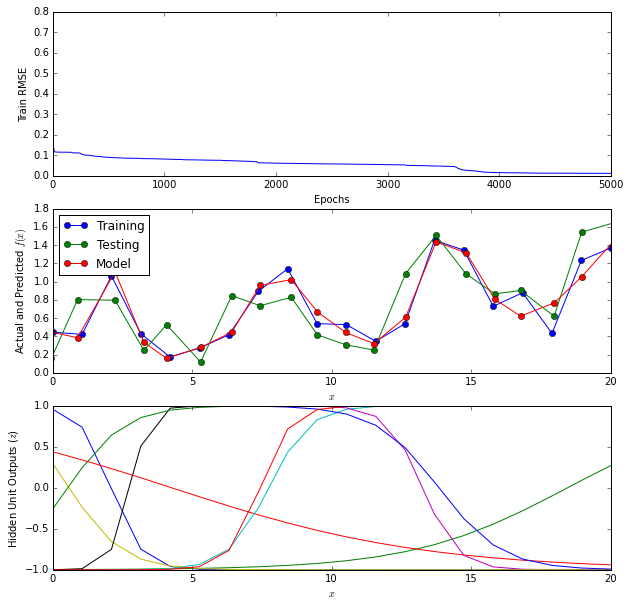

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(errorTrace)
plt.xlabel('Epochs')
plt.ylabel('Train RMSE')
plt.subplot(3,1,2)
Y = np.dot(addOnes(np.tanh(np.dot(X1,V))), W) 
Ytest = np.dot(addOnes(np.tanh(np.dot(Xtest1,V))), W)
plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
plt.xlim(0,20)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')
        
plt.subplot(3,1,3)
Z = np.tanh(np.dot(X1,V))
plt.plot(X,Z)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

## Neural Network Class

Python includes the ability to define new classes.  Let's write one for neural networks.  First, let's discuss how it might be used. Make it as easy for the user as possible.

    X = ...
    T = ...
    nnet = NeuralNetWork(1,5,1)  # 1 input, 5 hidden units, 1 output
    nnet.train(X,T,nIterations=100)
    Y = nnet.use(X)
    
This implementation is for any number of hidden layers!

In [20]:
import numpy as np
import scaledconjugategradient as scg
import mlutils as ml  # for draw()

class NeuralNetwork:

    def __init__(self, ni,nhs,no):        
        try:
            nihs = [ni] + list(nhs)
        except:
            nihs = [ni] + [nhs]
            nhs = [nhs]
        self.Vs = [np.random.uniform(-0.1,0.1,size=(1+nihs[i],nihs[i+1])) for i in range(len(nihs)-1)]
        self.W = np.random.uniform(-0.1,0.1,size=(1+nhs[-1],no))
        self.ni,self.nhs,self.no = ni,nhs,no
        self.Xmeans = None
        self.Xstds = None
        self.Tmeans = None
        self.Tstds = None
        self.trained = False
        self.reason = None
        self.errorTrace = None
        self.numberOfIterations = None

    def __repr__(self):
        str = 'NeuralNetwork({}, {}, {})'.format(self.ni,self.nhs,self.no)
        # str += '  Standardization parameters' + (' not' if self.Xmeans == None else '') + ' calculated.'
        if self.trained:
            str += '\n   Network was trained for {} iterations. Final error is {}.'.format(self.numberOfIterations,
                                                                                           self.errorTrace[-1])
        else:
            str += '  Network is not trained.'
        return str
            
    def standardizeX(self,X):
        return (X - self.Xmeans) / self.Xstds
    def unstandardizeX(self,Xs):
        return self.Xstds * Xs + self.Xmeans
    def standardizeT(self,T):
        return (T - self.Tmeans) / self.Tstds
    def unstandardizeT(self,Ts):
        return self.Tstds * Ts + self.Tmeans
    
    def train(self,X,T,
              nIterations=100,weightPrecision=0,errorPrecision=0):
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
        X = self.standardizeX(X)

        if T.ndim == 1:
            T = T.reshape((-1,1))

        if self.Tmeans is None:
            self.Tmeans = T.mean(axis=0)
            self.Tstds = T.std(axis=0)
        T = self.standardizeT(T)

        # Local functions used by scg()

        def pack(Vs,W):
            return np.hstack([V.flat for V in Vs] + [W.flat])

        def unpack(w):
            first = 0
            numInThisLayer = self.ni
            for i in range(len(self.Vs)):
                self.Vs[i][:] = w[first:first+(numInThisLayer+1)*self.nhs[i]].reshape((numInThisLayer+1,self.nhs[i]))
                first += (numInThisLayer+1) * self.nhs[i]
                numInThisLayer = self.nhs[i]
            self.W[:] = w[first:].reshape((numInThisLayer+1,self.no))

        def objectiveF(w):
            unpack(w)
            Zprev = X
            for i in range(len(self.nhs)):
                V = self.Vs[i]
                Zprev = np.tanh(np.dot(Zprev,V[1:,:]) + V[0:1,:])  # handling bias weight without adding column of 1's
            Y = np.dot(Zprev, self.W[1:,:]) + self.W[0:1,:]
            return np.mean((T-Y)**2)

        def gradF(w):
            unpack(w)
            Zprev = X
            Z = [Zprev]
            for i in range(len(self.nhs)):
                V = self.Vs[i]
                Zprev = np.tanh(np.dot(Zprev,V[1:,:]) + V[0:1,:])
                Z.append(Zprev)
            Y = np.dot(Zprev, self.W[1:,:]) + self.W[0:1,:]
            delta = -(T - Y) / (X.shape[0] * T.shape[1])
            dW = 2 * np.vstack((np.dot(np.ones((1,delta.shape[0])),delta),  np.dot( Z[-1].T, delta)))
            dVs = []
            delta = (1-Z[-1]**2) * np.dot( delta, self.W[1:,:].T)
            for Zi in range(len(self.nhs),0,-1):
                Vi = Zi - 1 # because X is first element of Z
                dV = 2 * np.vstack(( np.dot(np.ones((1,delta.shape[0])), delta),
                                 np.dot( Z[Zi-1].T, delta)))
                dVs.insert(0,dV)
                delta = np.dot( delta, self.Vs[Vi][1:,:].T) * (1-Z[Zi-1]**2)
            return pack(dVs,dW)

        scgresult = scg.scg(pack(self.Vs,self.W), objectiveF, gradF,
                            xPrecision = weightPrecision,
                            fPrecision = errorPrecision,
                            nIterations = nIterations,
                            ftracep=True)

        unpack(scgresult['x'])
        self.reason = scgresult['reason']
        self.errorTrace = np.sqrt(scgresult['ftrace']) # * self.Tstds # to unstandardize the MSEs
        self.numberOfIterations = len(self.errorTrace)
        self.trained = True
        return self

    def use(self,X,allOutputs=False):
        Zprev = self.standardizeX(X)
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = np.tanh(np.dot(Zprev,V[1:,:]) + V[0:1,:])
            Z.append(Zprev)
        Y = np.dot(Zprev, self.W[1:,:]) + self.W[0:1,:]
        Y = self.unstandardizeT(Y)
        return (Y,Z[1:]) if allOutputs else Y

    def getNumberOfIterations(self):
        return self.numberOfIterations
    
    def getErrors(self):
        return self.errorTrace
        
    def draw(self,inputNames = None, outputNames = None):
        ml.draw(self.Vs, self.W, inputNames, outputNames)

If the above class definition is placed in a file named *neuralnetworks.py*, then an instance of this class can be instantiated using code like

    import neuralnetworks as nn
    nnet = nn.NeuralNetwork(1,4,1)
    
The files *scaledconjugategradient.py* and *mlutils.py* must be in your working directory.

In this notebook, since the class was defined in the notebook, we only have to do

    nnet = NeuralNetwork(1,4,1)

SCG stopped after 683 iterations: limit on f Precision
Final RMSE: train 0.000801139296678 test 2.86187025928


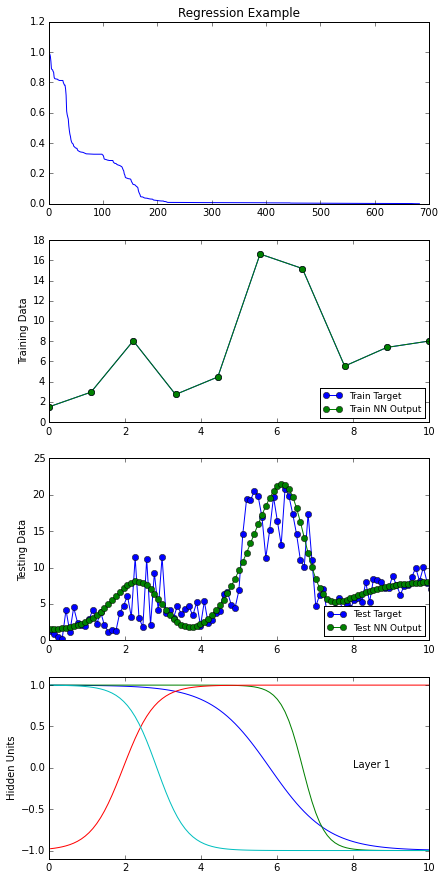

In [21]:
nSamples = 10
X = np.linspace(0,10,nSamples).reshape((-1,1))
T = 1.5 + 0.6 * X + 0.8 * np.sin(1.5*X)
T[np.logical_and(X > 2, X < 3)] *= 3
T[np.logical_and(X > 5, X < 7)] *= 3

nSamples = 100
Xtest = np.linspace(0,10,nSamples).reshape((-1,1)) + 10.0/nSamples/2
Ttest = 1.5 + 0.6 * Xtest + 0.8 * np.sin(1.5*Xtest) + np.random.uniform(-2,2,size=(nSamples,1))
Ttest[np.logical_and(Xtest > 2, Xtest < 3)] *= 3
Ttest[np.logical_and(Xtest > 5,Xtest < 7)] *= 3

nnet = NeuralNetwork(1,4,1)

nnet.train(X,T,errorPrecision=1.e-10,weightPrecision=1.e-10,nIterations=1000)
print("SCG stopped after",nnet.getNumberOfIterations(),"iterations:",nnet.reason)
Y = nnet.use(X)
Ytest,Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)),"test",np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(15,15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows,2,1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')
plt.subplot(nPlotRows,2,3)
plt.plot(X,T,'o-')
plt.plot(X,Y,'o-')
plt.ylabel('Training Data')
plt.legend(('Train Target','Train NN Output'),loc='lower right', prop={'size':9})
plt.subplot(nPlotRows,2,5)
plt.plot(Xtest,Ttest,'o-')
plt.plot(Xtest,Ytest,'o-')
plt.ylabel('Testing Data')
plt.xlim(0,10)
plt.legend(('Test Target','Test NN Output'),loc='lower right', prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers-i-1
    plt.subplot(nPlotRows,2,i*2+7)
    plt.plot(Xtest,Ztest[layer])
    plt.xlim(0,10)
    plt.ylim(-1.1,1.1)
    plt.ylabel('Hidden Units')
    plt.text(8,0, 'Layer {}'.format(layer+1))

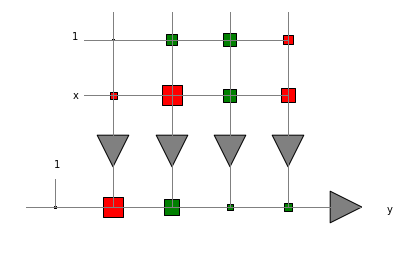

In [22]:
nnet.draw(['x'],['y'])

What happens if we add another two hidden layers, for a total of three hidden layers?  Let's use 3 units in each hidden layer.

In [23]:
NeuralNetwork(1,(3,3,3),1)

NeuralNetwork(1, (3, 3, 3), 1)  Network is not trained.

The rest of the code is the same.  Even the plotting code written above works for as many hidden layers as we create.

SCG stopped after 1001 iterations: did not converge
Final RMSE: train 5.1467503641e-11 test 2.8599099622


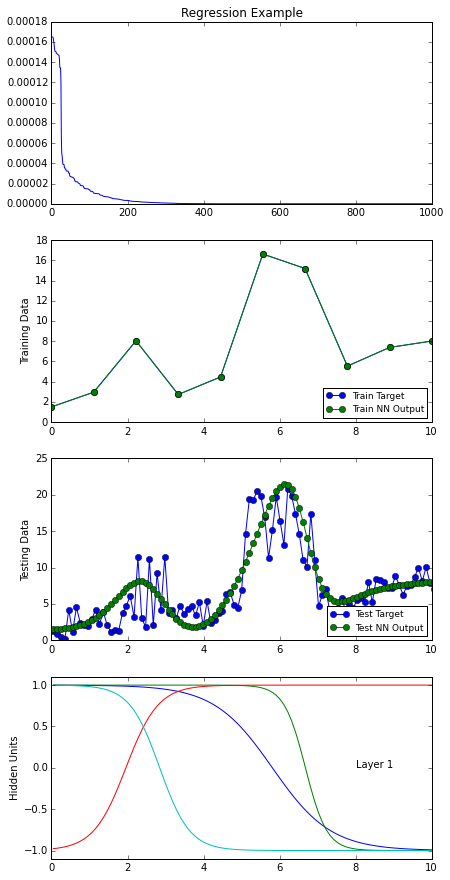

In [24]:
nnet.train(X,T,nIterations=1000) # precision not included, so defaults of zero used, which means will not terminate early
print("SCG stopped after",nnet.getNumberOfIterations(),"iterations:",nnet.reason)
Y = nnet.use(X)
Ytest,Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)),"test",np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(15,15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows,2,1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')
plt.subplot(nPlotRows,2,3)
plt.plot(X,T,'o-')
plt.plot(X,Y,'o-')
plt.ylabel('Training Data')
plt.legend(('Train Target','Train NN Output'),loc='lower right',prop={'size':9})
plt.subplot(nPlotRows,2,5)
plt.plot(Xtest,Ttest,'o-')
plt.plot(Xtest,Ytest,'o-')
plt.ylabel('Testing Data')
plt.xlim(0,10)
plt.legend(('Test Target','Test NN Output'),loc='lower right',prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers-i-1
    plt.subplot(nPlotRows,2,i*2+7)
    plt.plot(Xtest,Ztest[layer])
    plt.xlim(0,10)
    plt.ylim(-1.1,1.1)
    plt.ylabel('Hidden Units')
    plt.text(8,0, 'Layer {}'.format(layer+1))

For more fun, wrap the above code in a function to make it easy to try different network structures.

In [25]:
def run(X,T,hiddenUnits,nIterations=100):
    if X.shape[1] != 1 or T.shape[1] != 1:
        print('This function written for one-dimensional input samples, X, and one-dimensional targets, T.')
        return
    
    nnet = NeuralNetwork(1,hiddenUnits,1)

    nnet.train(X,T,nIterations=nIterations)
    # print("SCG stopped after",nnet.getNumberOfIterations(),"iterations:",nnet.reason)
    Y = nnet.use(X)
    Ytest,Ztest = nnet.use(Xtest, allOutputs=True)
    print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)),"test",np.sqrt(np.mean((Ytest-Ttest)**2)))

    plt.figure(figsize=(15,15))
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers

    plt.subplot(nPlotRows,2,1)
    plt.plot(nnet.getErrors())
    plt.title('Regression Example')

    plt.subplot(nPlotRows,2,3)
    plt.plot(X,T,'o-')
    plt.plot(X,Y,'o-')
    plt.ylabel('Training Data')
    plt.legend(('Train Target','Train NN Output'),loc='lower right', prop={'size':9})
    plt.subplot(nPlotRows,2,5)
    plt.plot(Xtest,Ttest,'o-')
    plt.plot(Xtest,Ytest,'o-')
    plt.ylabel('Testing Data')
    plt.xlim(0,10)
    plt.legend(('Test Target','Test NN Output'),loc='lower right', prop={'size':9})
    for i in range(nHLayers):
        layer = nHLayers-i-1
        plt.subplot(nPlotRows,2,i*2+7)
        plt.plot(Xtest,Ztest[layer])
        plt.xlim(0,10)
        plt.ylim(-1.1,1.1)
        plt.ylabel('Hidden Units')
        plt.text(8,0, 'Layer {}'.format(layer+1))
        
    return nnet

Final RMSE: train 1.69401142414 test 3.57385740255


NeuralNetwork(1, (2, 2), 1)
   Network was trained for 101 iterations. Final error is 0.3495607535234581.

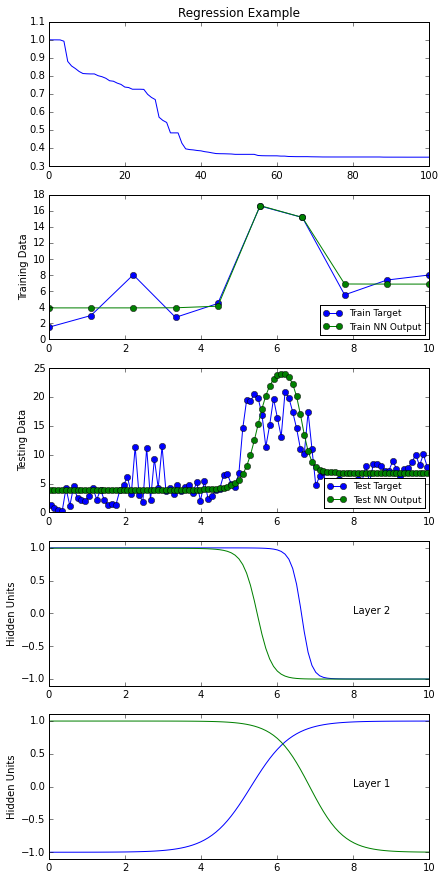

In [26]:
run(X,T,(2,2))

Final RMSE: train 1.69238749634 test 3.57131119428


NeuralNetwork(1, (2, 2, 2, 2), 1)
   Network was trained for 101 iterations. Final error is 0.349225654587354.

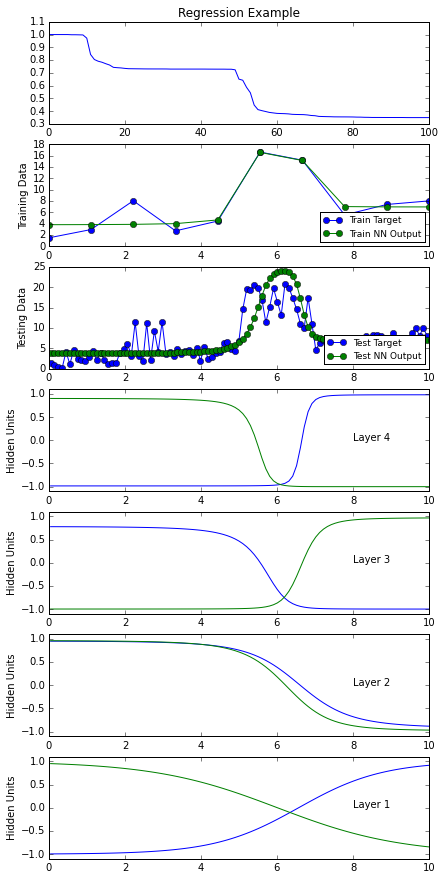

In [27]:
run(X,T,(2,2,2,2))

In [49]:
[2]*6

[2, 2, 2, 2, 2, 2]

Final RMSE: train 1.51670466657e-12 test 2.93722375699


NeuralNetwork(1, [2, 2, 2, 2, 2, 2], 1)
   Network was trained for 10001 iterations. Final error is 3.1293700421158344e-13.

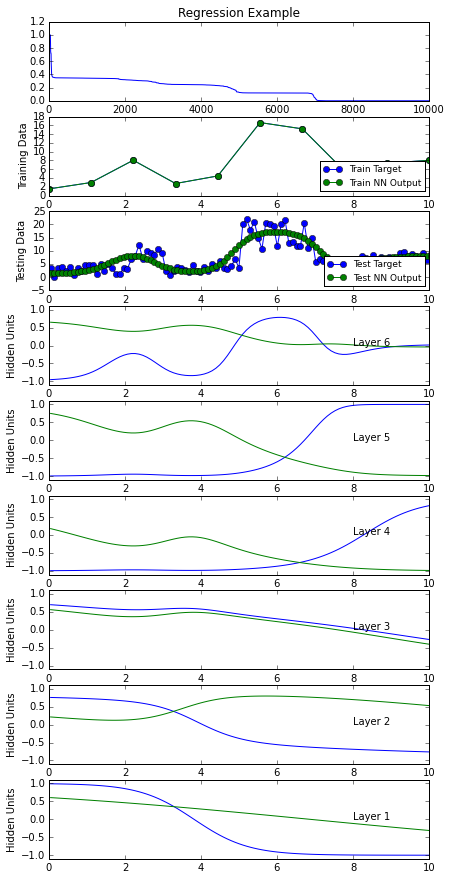

In [50]:
run(X,T,[2]*6,nIterations=10000)

Can you say "deep learning"?

This last example doesn't always work.  Depends a lot on good initial random weight values. Go back to the above cell and run it again and again, until you see it not work.

Final RMSE: train 5.99876470676e-13 test 4.3808482528


NeuralNetwork(1, (10, 10, 10, 10), 1)
   Network was trained for 1001 iterations. Final error is 1.2378301841852557e-13.

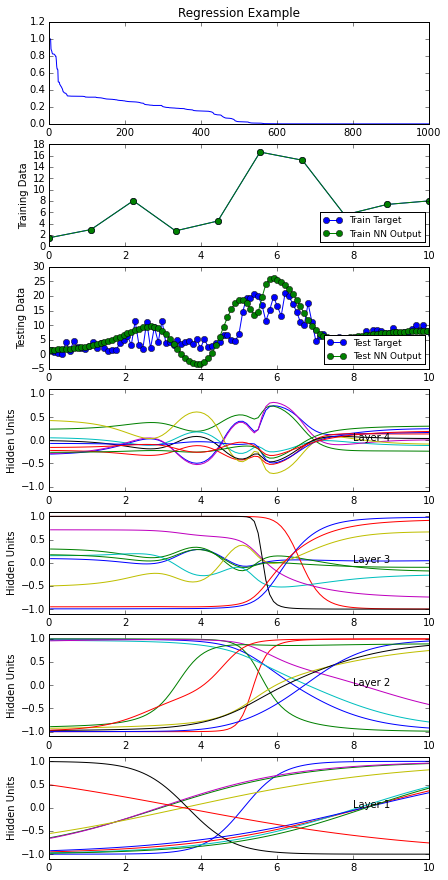

In [28]:
nnet = run(X,T,(10,10,10,10),nIterations=1000)
nnet

Run the above cell several times to see very different solutions as observed in the pattern of hidden layer outputs.

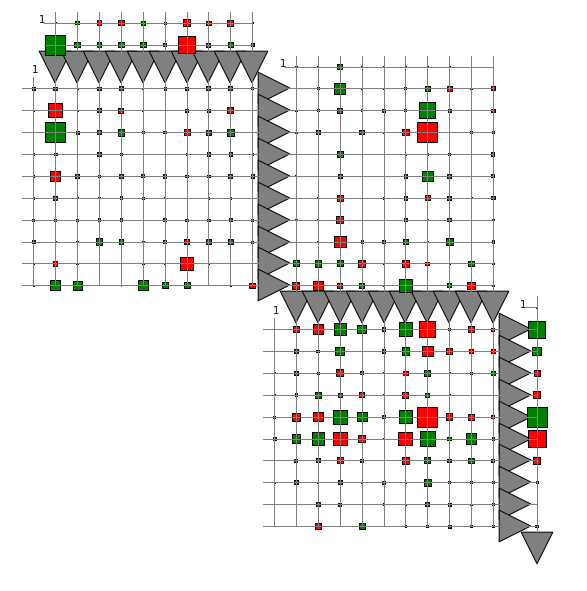

In [29]:
plt.figure(figsize=(10,10))
nnet.draw()